##Unsupervised Learning

**Task 1: K-Means Clustering**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Data Generation (DO NOT MODIFY THIS CELL)
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.0, random_state=42)

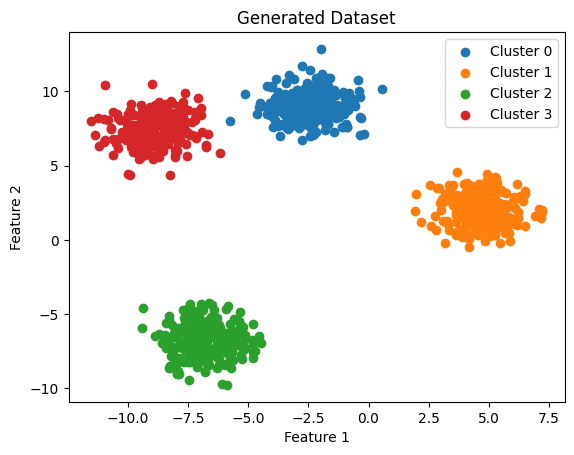

In [101]:
# Step 1: Visualize the generated dataset (feature 1,2 should be x and y axis respectively, use distinct colors for each class)
# Specify the appropriate labels and title

# (5 points)
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
for i in np.unique(y):
  plt.scatter(X[y==i, 0], X[y==i, 1], label=f"Cluster {i}")
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



In [102]:
# Step 2: Create a function to visualize the clusters (can reuse code from previous step)
#  and its centroids resulting from fitting the KMeans model from sklearn
# Specify the appropriate title, xlabel, ylabel, legend (mark the centroids)
# title should have the corresponding 'k' (e.g. K-Means Clustering (k=3)) value for each plot you make using this function

# (5 points)

def plot_clusters(X, labels, centroids, title):
  colors = ["red", "orange", "yellow", "green", "blue", "purple"]
  for i in np.unique(labels):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], c=colors[i], label=f"Cluster {i}")
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=300, label="Centroid", c='black')
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()

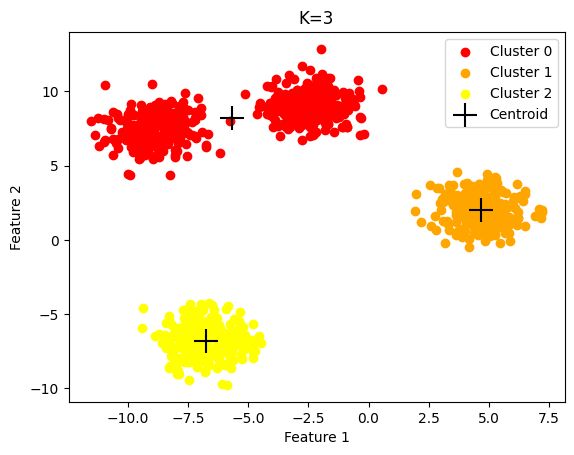

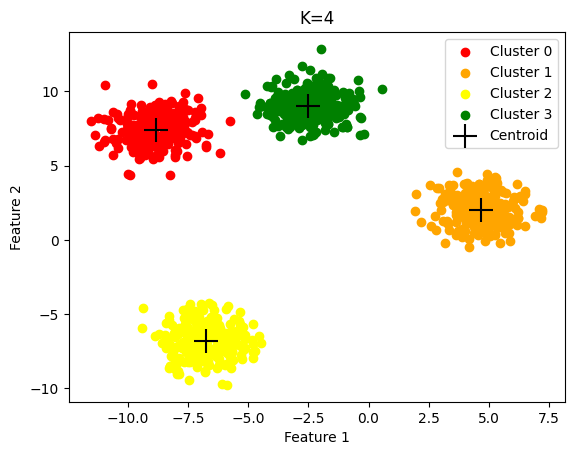

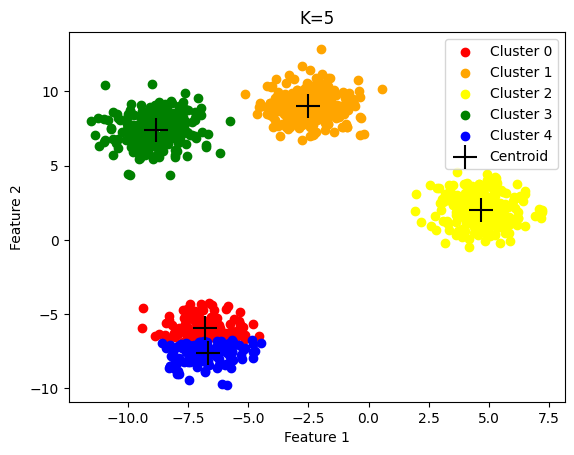

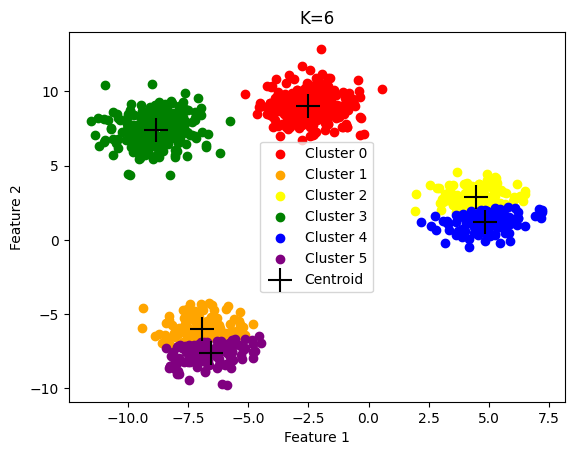

In [103]:
# Step 3: Perform k-means clustering for different values of 'k' and visualize the results for each value using the function from the last step
# It is recommended to use a short range of values [3,6] for this step, otherwise there will be too many visualizations

# (7 points)

for k in range(3, 7):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_, f'K={k}')

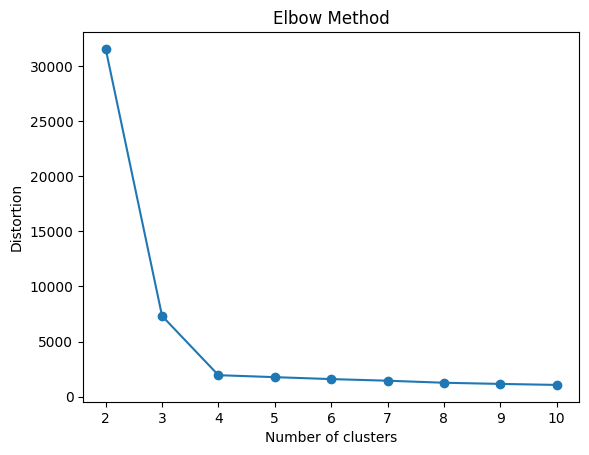

Best k: 4 , silhouette score=0.7915983870089952
Dictionary of Cluster:Size Below
{0: 251, 1: 250, 2: 250, 3: 249}


In [104]:
# Step 4: Use the Elbow Method (i.e. make a plot) to find the optimal 'k' by using distortions/inertia (kmeans.inertia_)
# Also, record the silhouette score for each 'k', print the max score and corresponding 'k'
# can use a slightly larger range for this [2, 10] DON'T USE 1 as it will fail (Silhouette score requires more than 1 cluster)
# Print the size of each cluster resulting from the best KMeans Model

# To Learn about Inertia: https://scikit-learn.org/stable/modules/clustering.html#k-means

# (13 points)

distortions = []
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  distortions.append(kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

best_k = np.argmax(silhouette_scores) + 2
print(f"Best k: {best_k} , silhouette score={silhouette_scores[np.argmax(silhouette_scores)]}")
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print("Dictionary of Cluster:Size Below")
print(dict(zip(unique, counts)))


**Task 2: Agglomerative Clustering**

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.spatial.distance import pdist

# Data Generation (DO NOT MODIFY)
X, y = make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=3, random_state=42)

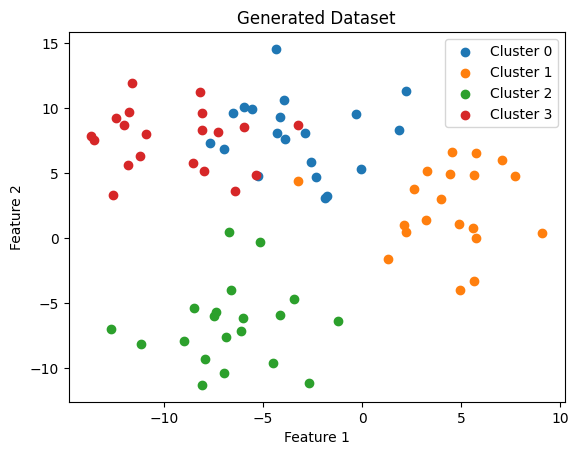

In [115]:
# Step 1: Visualize the generated dataset (feature 1,2 should be x and y axis respectively, use distinct colors for each class)

# (5 points)
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
for i in np.unique(y):
  plt.scatter(X[y==i, 0], X[y==i, 1], label=f"Cluster {i}")
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


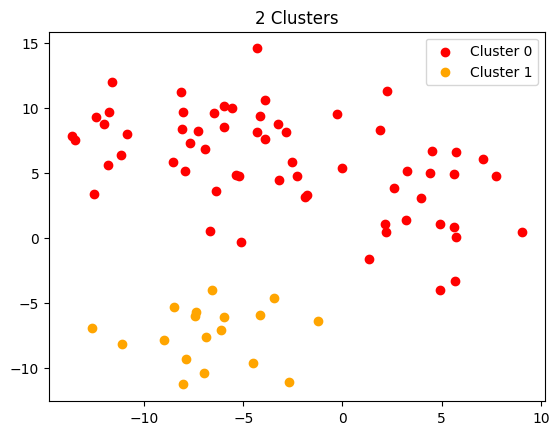

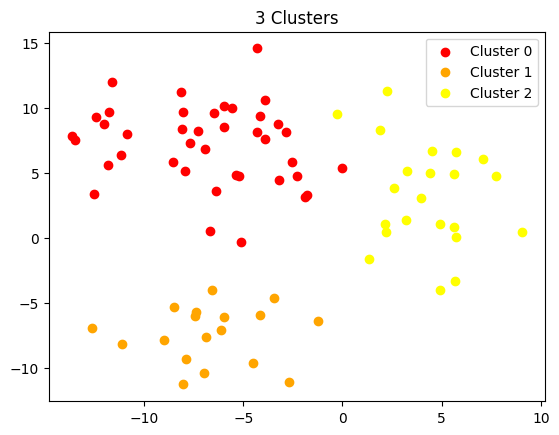

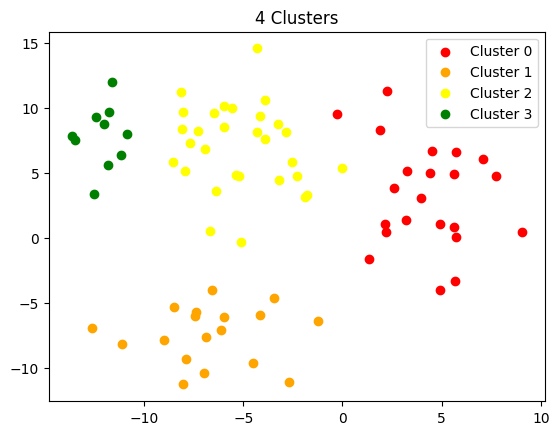

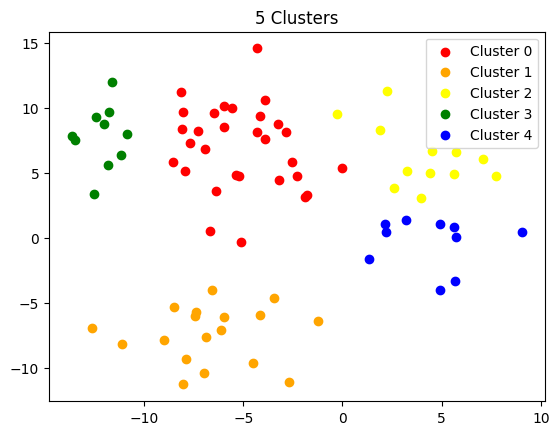

In [116]:
# Step 2: Create a function to visualize the clusters (can reuse some code from previous step)
# and Perform agglomerative clustering for different numbers of clusters [2, 5] and visualize the results using the function
# Specify the appropriate labels and value of 'k' in the title for each plot

# (8 points)


def visualize_clusters(X, y, k):
  colors = ["red", "orange", "yellow", "green", "blue", "purple"]
  for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], c=colors[i], label=f"Cluster {i}")
  plt.title(f"{k} Clusters")
  plt.legend()
  plt.show()

for k in range(2, 6):
  new_model = AgglomerativeClustering(n_clusters=k)
  new_model_pred = new_model.fit_predict(X)
  visualize_clusters(X, new_model_pred, k)


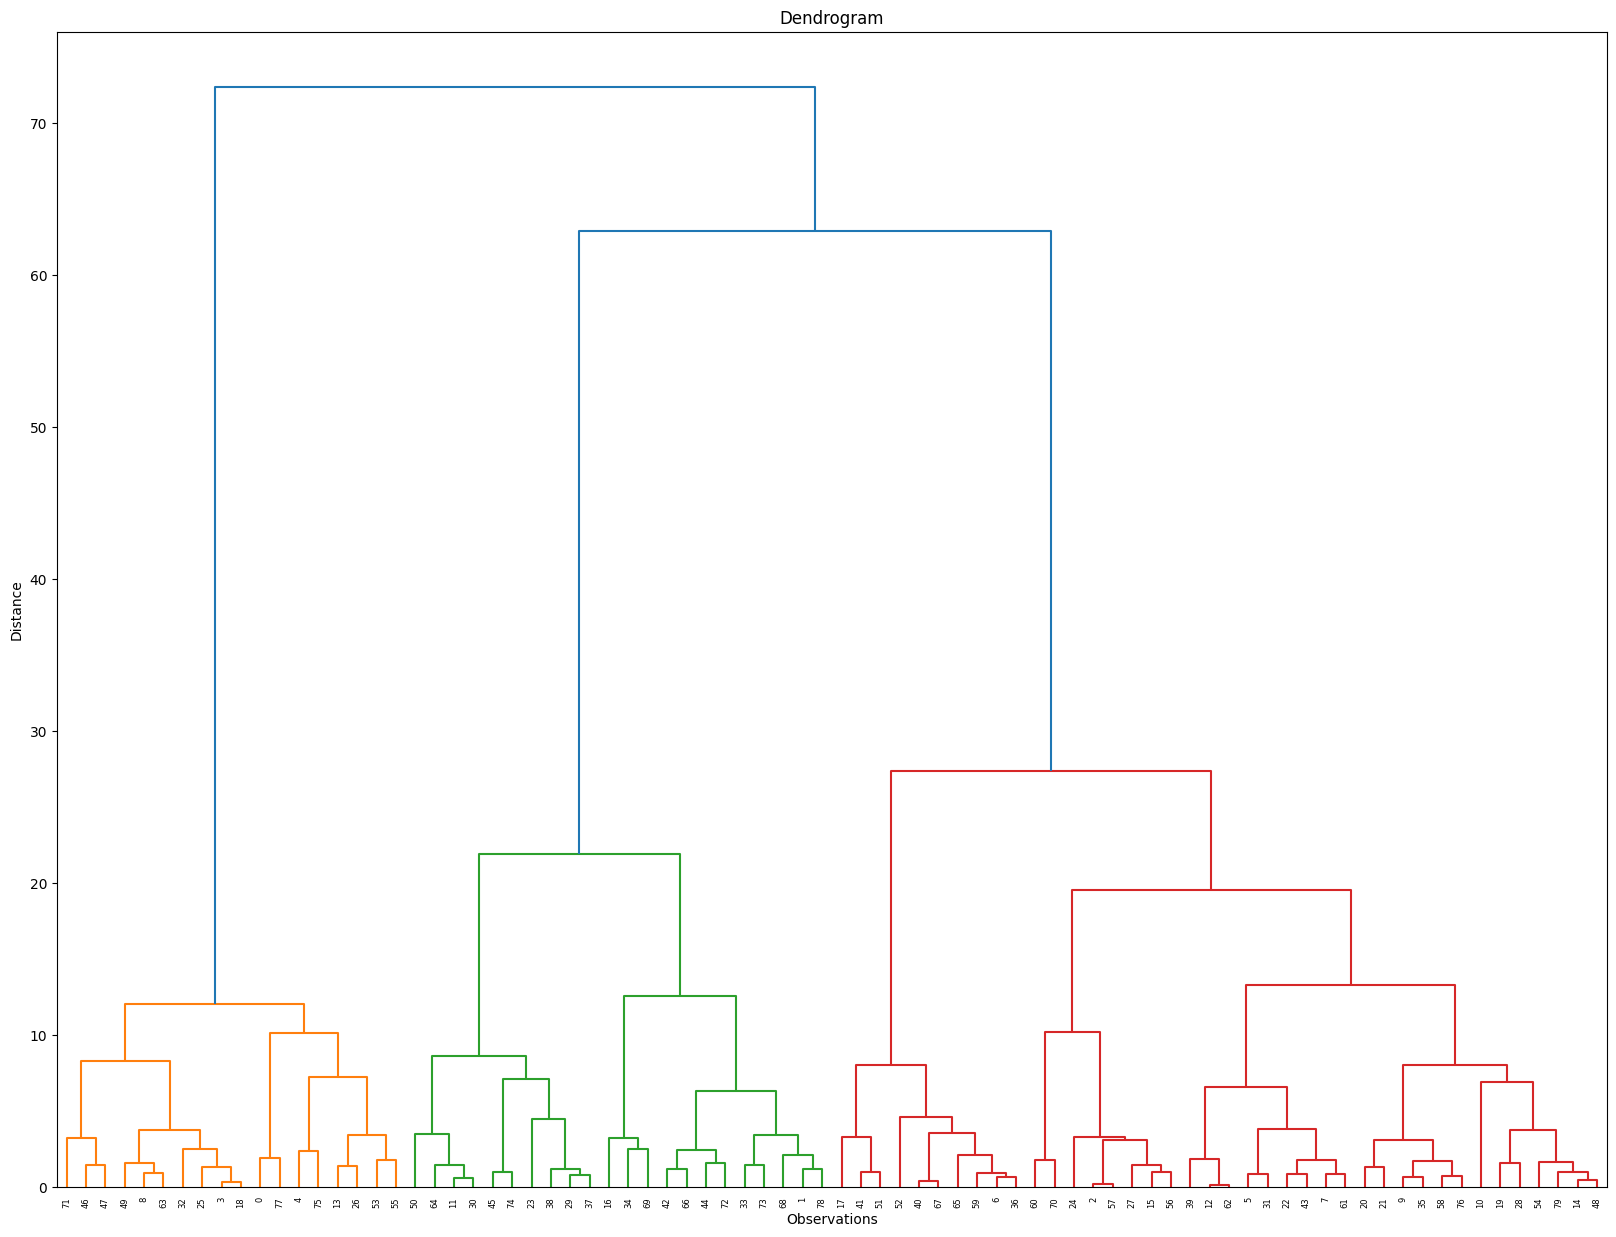

In [117]:
# Step 3: Plot the Dendrogram for Hierarchical Clustering using Ward's linkage
# Use a higher width number when creating the figure if the x-axis looks dense
# Specify the appropriate title, xlabel, ylabel

# (6 points)

plt.figure(figsize=(20, 15))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
linkage_matrix = ward(pdist(X))
dendrogram(linkage_matrix)
plt.show()



In [118]:
# Step 4: Hierarchical Clustering Metrics
# Evaluate silhouette scores for different numbers of clusters [2, 10]
# Print the Max Silhouette score and the corresponding no. of clusters

# (6 points)

max_score = -1
max_k = -1
for k in range(2, 11):
  model = AgglomerativeClustering(n_clusters=k, linkage='ward')
  y_pred = model.fit_predict(X)
  score = silhouette_score(X, y_pred)
  if score > max_score:
    max_score = score
    max_k = k
print(f"My max silhouette score is {max_score} with a k of {max_k}.")



My max silhouette score is 0.5261954873892156 with a k of 3.


**Task 3: DBSCAN**

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.preprocessing import StandardScaler

# Data Generation (DO NOT MODIFY)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)


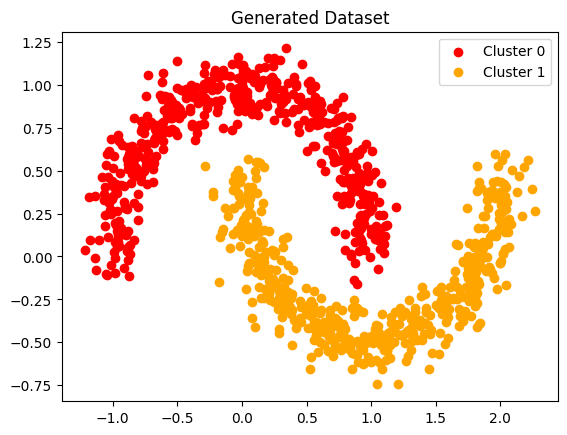

In [120]:
# Step 1: Visualize the generated dataset (feature 1,2 should be x and y axis respectively, use distinct colors for each class)

# (5 points)
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
for i in np.unique(y):
    plt.scatter(X[y==i, 0], X[y==i, 1], c=colors[i], label=f"Cluster {i}")
plt.title('Generated Dataset')
plt.legend(['Cluster 0', 'Cluster 1'])
plt.show()


In [134]:
# Step 2: create a function to plot the dbscan clusters
# Specify the appropriate title, xlabel, ylabel, legend
# For the legend, note that Cluster -1 means "Outlier" and you should label it as such.

# (8 points)

def dbscan_graph(X, labels):
  colors = ["red", "orange", "yellow", "green", "blue", "purple"]
  for i in np.unique(labels):
    if i == -1:
      plt.scatter(X[labels==i, 0], X[labels==i, 1], c="black", label=f"Outlier")
    else:
      plt.scatter(X[labels==i, 0], X[labels==i, 1], c=colors[i], label=f"Cluster {i}")
  plt.title(f"DBSCAN Predictions")
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()



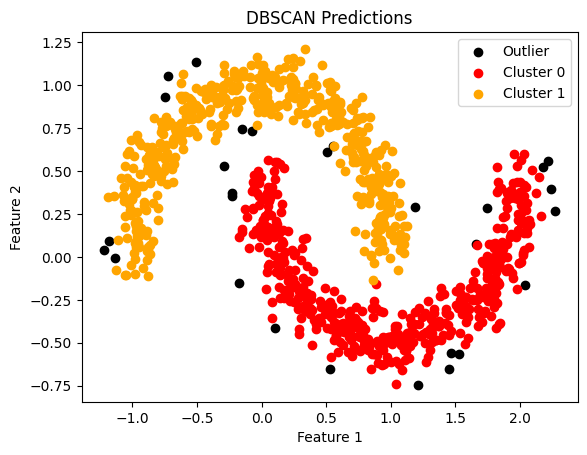

In [135]:
# Step 3: Perform DBSCAN clustering with eps=0.1, min_samples=5
# Plot the result using the function created in the previous step

# (4 points)
dbscan = DBSCAN(eps=0.1, min_samples=5)
pred = dbscan.fit_predict(X)
dbscan_graph(X, pred)




In [139]:
# Step 4: Print Evaluation Metrics (silhouette_score, rand_score, adjusted_rand_score)

# (3 points)

print(f"silhouette_score={silhouette_score(X,pred)} \nrand_score={rand_score(y,pred)}  \nadjusted_rand_score={adjusted_rand_score(y,pred)}")


silhouette_score=0.2501028498989781 
rand_score=0.9704744744744744  
adjusted_rand_score=0.9409457162331193
